In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import seaborn as sb
from plotter import *

In [2]:
path = 'simulations/uiuc/data_files/UIUC_CC30_52.sqlite'
conn = sqlite3.connect(path)

In [3]:
cursor = conn.cursor()
command = """SELECT DISTINCT scenario FROM Output_VFlow_Out"""
tab = cursor.execute(command)
scenarios = [s[0] for s in cursor.fetchall()]
scenarios

['CC30',
 'S01',
 'S01_mga_0',
 'S01_mga_1',
 'S01_mga_2',
 'S01_mga_3',
 'S01_mga_4',
 'S01_mga_5']

In [4]:
place = "UIUC"
carrier = 'ELC'
frames = []
for s in scenarios[1:]:
    df = get_annual_capacity(conn, place, carrier, scenario=s)
    N = len(df)
    df['SID'] = [s for i in range(N)]
    frames.append(df)

elc_df = pd.concat(frames)
elc_df

,ABBOTT_TB,IMP_ELC,LI_BATTERY,NUCLEAR_TB,SOLAR_FARM,WIND_FARM,SID
year,,,,,,,
2025,37.534091,50.000000,2.630745e+00,4.970322,32.470167,88.805607,S01
2030,70.486707,68.499056,2.630745e+00,9.851938,46.588652,87.065607,S01
2035,97.611469,88.648787,1.052298e+00,15.090878,77.166896,66.988902,S01
2040,103.650260,102.663160,0.000000e+00,19.874916,94.282795,66.988902,S01
2045,109.330690,102.663160,0.000000e+00,25.064506,99.844803,60.960731,S01
2050,109.330690,113.818440,0.000000e+00,30.102166,104.813400,62.988132,S01
2025,0.000000,53.998392,0.000000e+00,0.000000,31.994626,102.240000,S01_mga_0
2030,0.000000,56.821459,0.000000e+00,0.000000,671.765760,100.500000,S01_mga_0
2035,0.000000,73.415213,0.000000e+00,0.000000,671.765760,100.500000,S01_mga_0


In [5]:
cap_tech_df = elc_df.drop(columns='SID')

<AxesSubplot:>

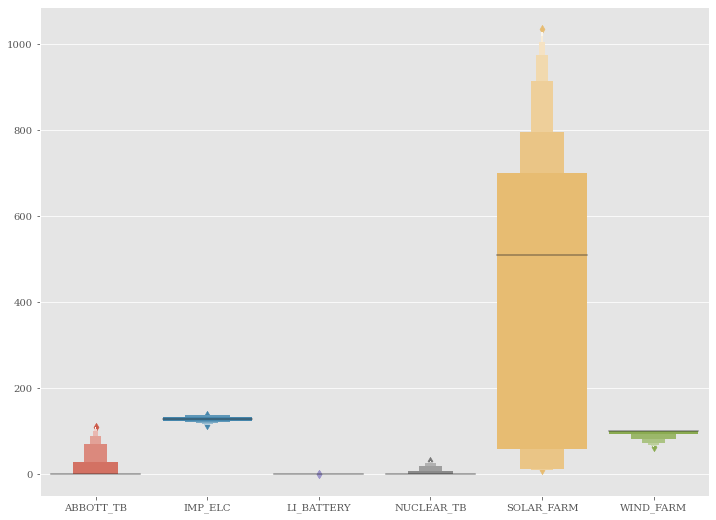

In [6]:
sb.boxenplot(data=cap_tech_df[cap_tech_df.index == 2050])

In [7]:
place = "UIUC"
carrier = ['STM', 'NUC_STM']
frames = []
for s in scenarios[1:]:
    df = get_annual_capacity(conn, place, carrier, scenario=s)
    N = len(df)
    df['SID'] = [s for i in range(N)]
    frames.append(df)

stm_df = pd.concat(frames)
stm_df.replace(12703.504000, np.nan, inplace=True)
stm_df

,ABBOTT,NUCLEAR_THM,SID
year,,,
2025,261.030000,0.000000,S01
2030,261.030000,0.000000,S01
2035,261.030000,0.000000,S01
2040,156.618000,3.582106,S01
2045,59.244982,47.960861,S01
2050,59.244982,87.783647,S01
2025,261.030000,20.075126,S01_mga_0
2030,261.030000,36.744010,S01_mga_0
2035,261.030000,45.954377,S01_mga_0


In [8]:
full_df = pd.concat([elc_df, stm_df], axis=1).drop_duplicates()
full_df

,ABBOTT_TB,IMP_ELC,LI_BATTERY,NUCLEAR_TB,SOLAR_FARM,WIND_FARM,SID,ABBOTT,NUCLEAR_THM,SID
year,,,,,,,,,,
2025,37.534091,50.000000,2.630745e+00,4.970322,32.470167,88.805607,S01,261.030000,0.000000,S01
2030,70.486707,68.499056,2.630745e+00,9.851938,46.588652,87.065607,S01,261.030000,0.000000,S01
2035,97.611469,88.648787,1.052298e+00,15.090878,77.166896,66.988902,S01,261.030000,0.000000,S01
2040,103.650260,102.663160,0.000000e+00,19.874916,94.282795,66.988902,S01,156.618000,3.582106,S01
2045,109.330690,102.663160,0.000000e+00,25.064506,99.844803,60.960731,S01,59.244982,47.960861,S01
2050,109.330690,113.818440,0.000000e+00,30.102166,104.813400,62.988132,S01,59.244982,87.783647,S01
2025,0.000000,53.998392,0.000000e+00,0.000000,31.994626,102.240000,S01_mga_0,261.030000,20.075126,S01_mga_0
2030,0.000000,56.821459,0.000000e+00,0.000000,671.765760,100.500000,S01_mga_0,261.030000,36.744010,S01_mga_0
2035,0.000000,73.415213,0.000000e+00,0.000000,671.765760,100.500000,S01_mga_0,261.030000,45.954377,S01_mga_0


In [9]:
full_df.replace(12703.504000, np.nan, inplace=True)

In [10]:
full_cap_df = full_df.drop(columns='SID')

<AxesSubplot:>

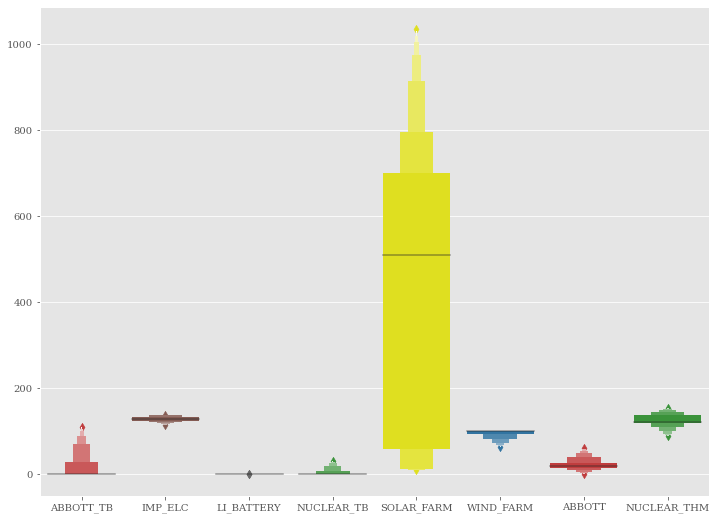

In [11]:
sb.boxenplot(data=full_cap_df[full_cap_df.index == 2050], palette=elc_colors)

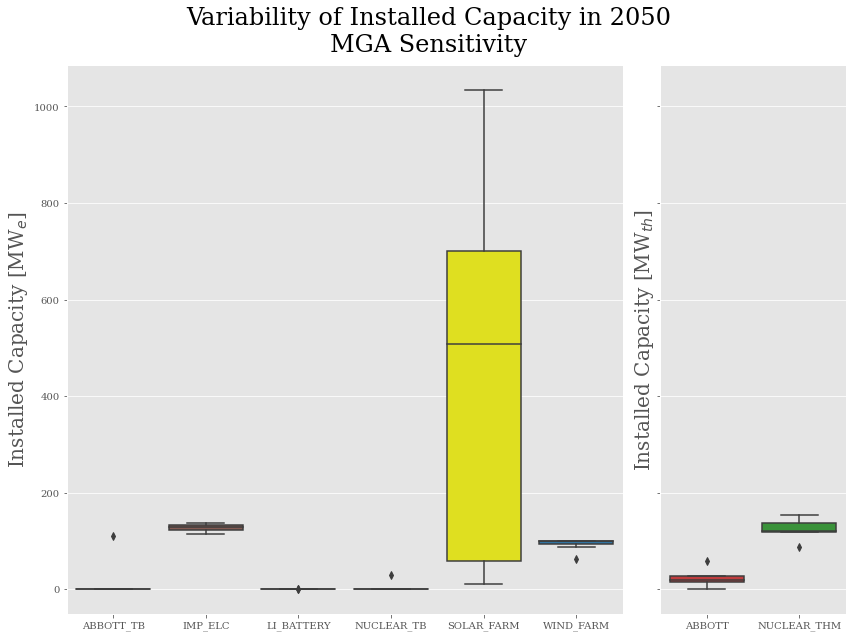

In [39]:
fig, axes = plt.subplots(1,2, sharey=True, gridspec_kw={'width_ratios': [3, 1]})
sb.boxplot(ax=axes[1], data=stm_df.drop(columns="SID").loc[2050], palette=elc_colors)
sb.boxplot(ax=axes[0], data=elc_df.drop(columns="SID").loc[2050], palette=elc_colors)
axes[0].set_ylabel('Installed Capacity [MW$_e$]', fontsize=20)
axes[1].set_ylabel('Installed Capacity [MW$_{th}$]', fontsize=20)
plt.suptitle('Variability of Installed Capacity in 2050\nMGA Sensitivity', fontsize=24)
plt.tight_layout()

In [13]:
place = "UIUC"
carrier = 'CHW'
frames = []
for s in scenarios[1:]:
    df = get_annual_capacity(conn, place, carrier, scenario=s)
    N = len(df)
    df['SID'] = [s for i in range(N)]
    frames.append(df)

cw_df = pd.concat(frames)
cw_df.replace(12703.504000, np.nan, inplace=True)
cw_df

,CWS,CW_STORAGE,SID
year,,,
2025,27271.057,4598.657300,S01
2030,28739.311,4730.433100,S01
2035,30174.898,4892.833800,S01
2040,31523.750,5136.548800,S01
2045,32894.348,5359.877000,S01
2050,34117.588,5721.353200,S01
2025,35681.725,0.000000,S01_mga_0
2030,50763.022,0.000000,S01_mga_0
2035,65112.753,0.000000,S01_mga_0


<AxesSubplot:>

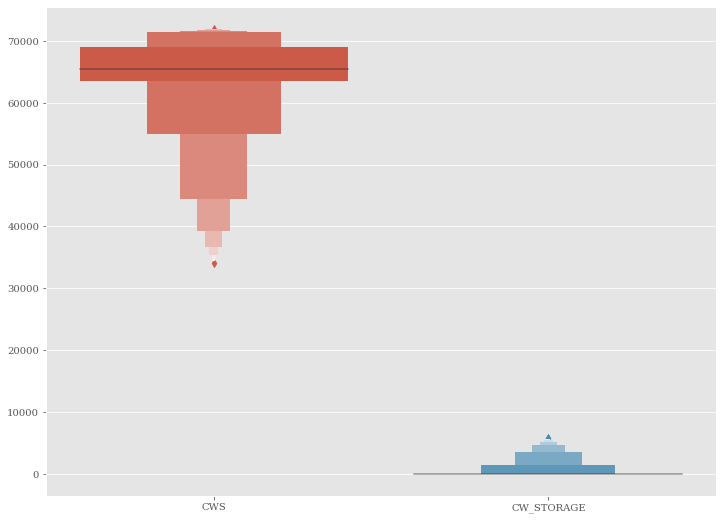

In [14]:
sb.boxenplot(data=cw_df.drop(columns='SID').loc[2050])

<AxesSubplot:xlabel='year'>

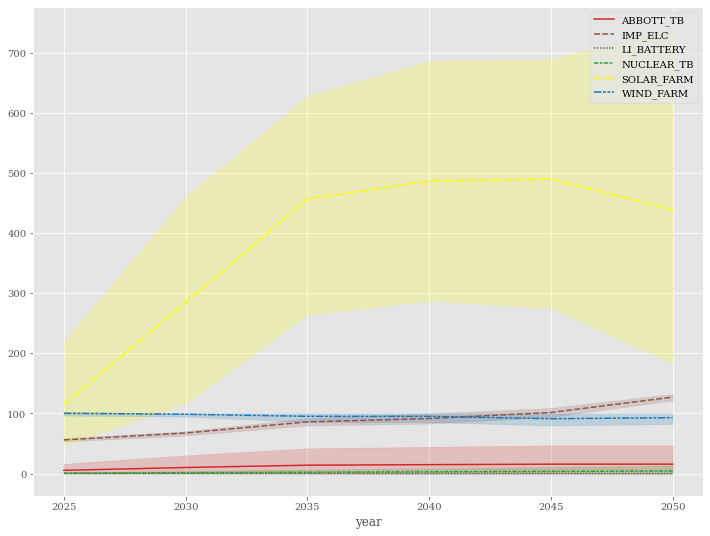

In [20]:
sb.lineplot(data=elc_df.drop(columns='SID'), palette=elc_colors)

In [30]:
v = list(elc_df.columns)
i = list(range(len(v)))
d = dict(zip(v,i))

In [31]:
sb.lineplot(x=elc_df['SID'],y=elc_df.iloc[d['SOLAR_FARM']], palette=elc_colors)

ValueError: cannot reindex from a duplicate axis

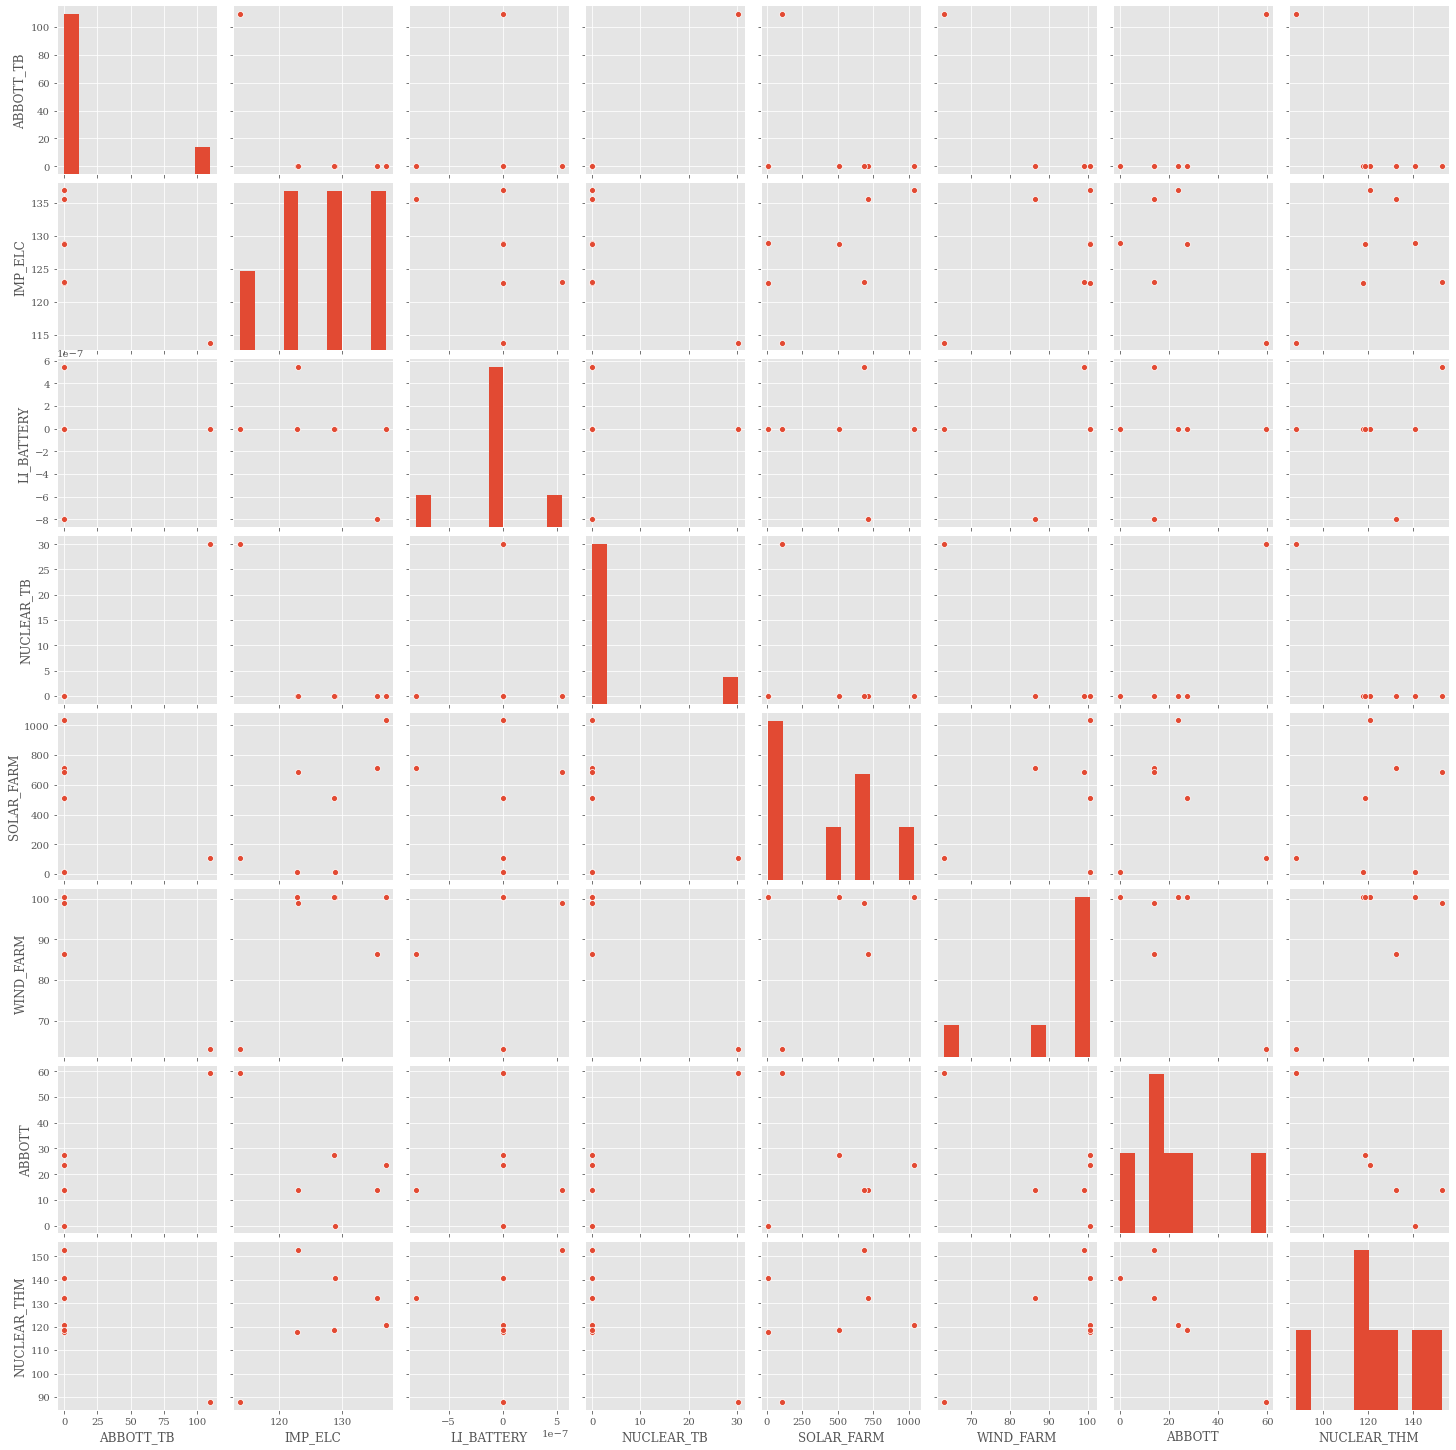

In [35]:
sb.pairplot(full_df.drop(columns='SID').groupby(elc_df.index).get_group(2050))